In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Perform EDA on NVIDIA, TESLA, COSTCO AND META Stock Prices

In [85]:
# pip install pandas-datareader

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
company_code = ['NVDA', 'TSLA', 'COST', 'META']

# Set up end and start times for data grab
start = '2024-01-01'
end = '2025-03-16'

NVDA = add_technical_indicators(get_stock_data('NVDA', start, end))
TSLA = add_technical_indicators(get_stock_data('TSLA', start, end))
COST = add_technical_indicators(get_stock_data('COST', start, end))
META = add_technical_indicators(get_stock_data('META', start, end))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Basic statistic of the data

In [75]:
NVDA.describe()

Price,Close,High,Low,Open,Volume,SMA_10,SMA_50,RSI,MACD,MACD_signal,Volatility,Returns,Target
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,,,,
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,119.699148,122.119571,117.207911,119.919751,3.297527e+08,119.229852,114.822129,54.237444,1.469300,1.642752,4.866027,0.001741,0.535714
std,18.922540,19.100562,18.770265,19.078169,1.368352e+08,18.694122,20.760309,10.556147,3.465001,3.134974,2.131417,0.035250,0.499715
min,76.174973,80.046700,75.581173,78.078345,1.051570e+08,82.978335,68.442964,33.350434,-6.140279,-4.640418,1.574211,-0.169682,0.000000
25%,107.228573,111.640439,104.753819,107.783436,2.265080e+08,107.978481,95.513787,46.733771,-0.780805,-0.521314,3.458060,-0.019075,0.000000
50%,123.509560,125.004194,119.914717,123.059177,3.023387e+08,124.607290,119.592060,53.696217,1.090279,1.038637,4.463046,0.003427,1.000000
75%,135.112579,138.442266,132.765287,136.312611,4.096044e+08,135.144817,133.774187,60.736101,4.203679,4.200306,5.844077,0.024824,1.000000
max,149.416245,153.115916,147.806407,153.015919,8.751980e+08,145.788538,139.978859,81.384836,9.775168,8.857050,12.208663,0.128121,1.000000


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

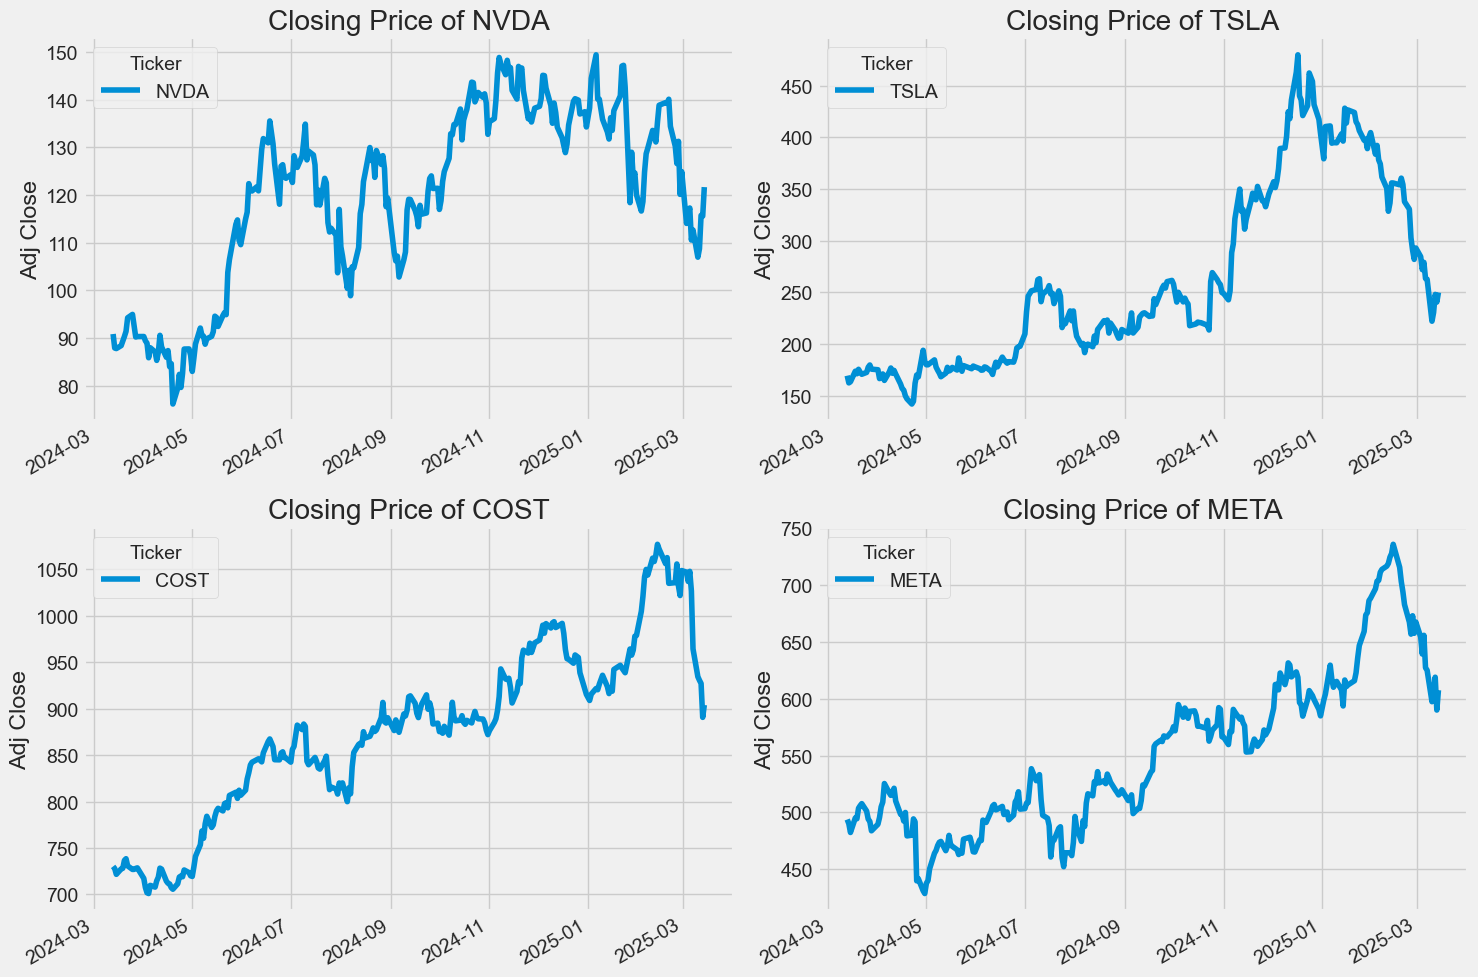

In [76]:
# Let's see a historical view of the closing price
company_list = [NVDA, TSLA, COST, META]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # flatten the 2x2 array for easier iteration

for i, company in enumerate(company_list):
    company['Close'].plot(ax=axs[i], title=f"Closing Price of {company_code[i]}")
    axs[i].set_ylabel('Adj Close')
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()


**1. Initial Uptrend (Spring to Mid/Late 2024)**
- Each stock shows an upward move from around March 2024 into mid- to late 2024. During this period, prices generally climb from their starting levels.
- **NVIDIA Stock raise significantly** in the middle of 2024 due to the advancement of AI field

**2. Subsequent Downtrend (Early 2025)**
- By early 2025 (around Febuary), they have fallen noticeably from their peaks and, this is mostly due to **Trump's trade war**


**3. Investor Sentiment and Uncertainty:**
- The sharp decline in early 2025 suggests that investors reacted negatively to the escalation of trade tensions. Trade wars often create uncertainty about future costs, supply chain stability, and market access—all of which can prompt a retraction from riskier assets such as tech stocks.

"Stocks fall again: Wall Street had its worst day of 2025 on Monday, with the S&P 500 index falling 2.7 percent a day after President Trump refused to rule out that his aggressive trade policies could cause a recession" by The New York Time (March 12th 2025)

## Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

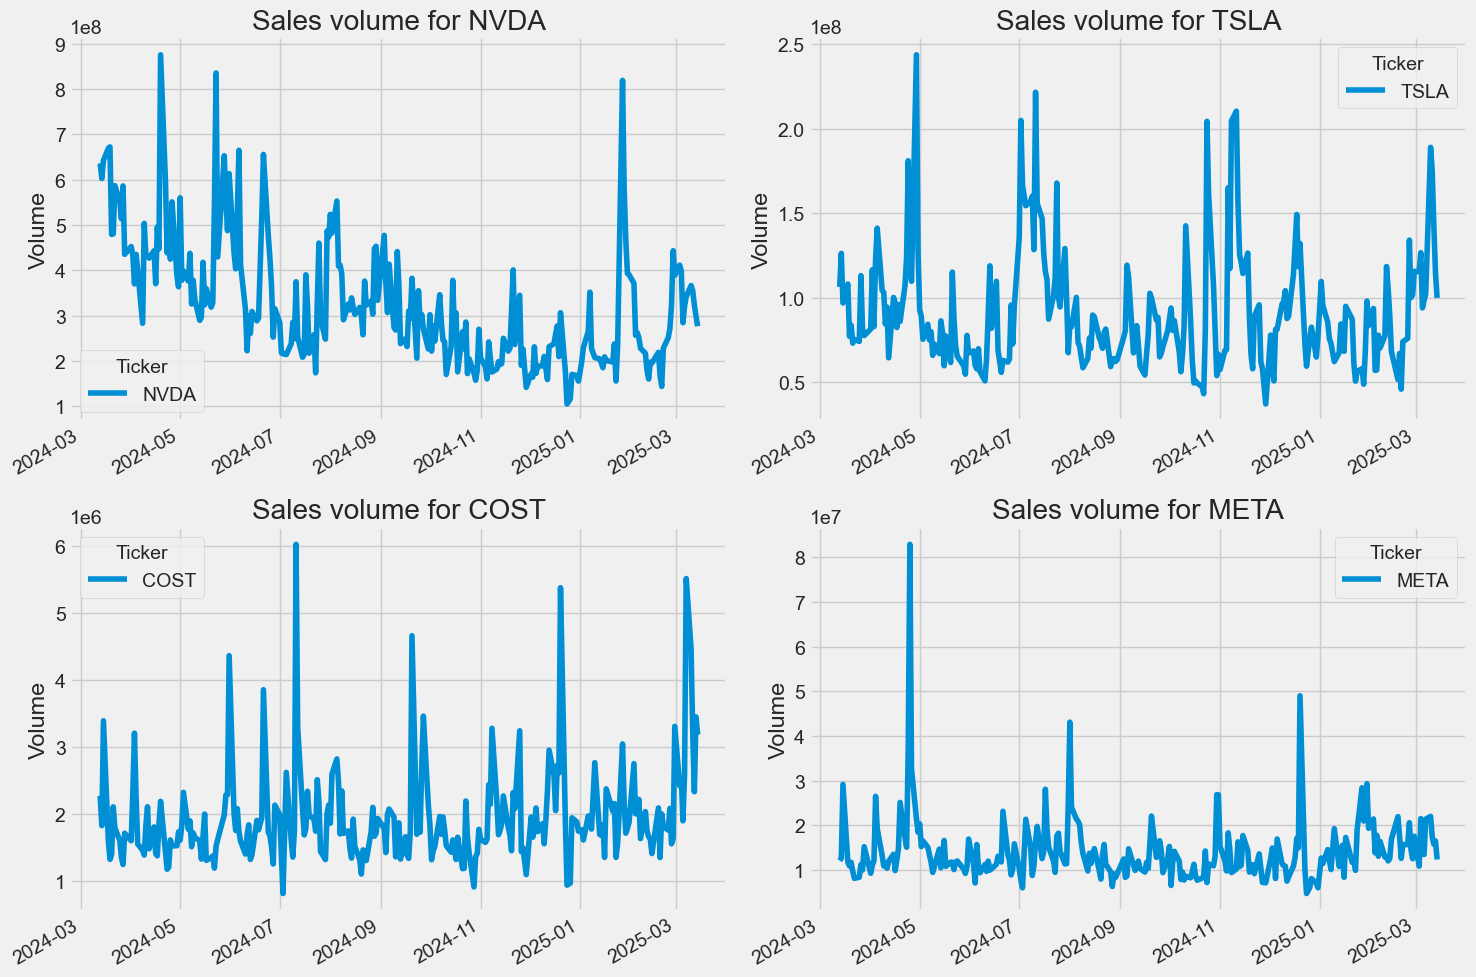

In [77]:
# Let's see a historical view of the closing price

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # flatten the 2x2 array for easier iteration

for i, company in enumerate(company_list):
    company['Volume'].plot(ax=axs[i], title=f"Sales volume for {company_code[i]}")
    axs[i].set_ylabel('Volume')
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()


### NVIDIA (NVDA)

- Frequent Spikes: NVDA’s volume shows multiple sharp peaks, often reaching 500-900 million shares in a day. These spikes likely coincide with events such as product announcements, earnings releases, or significant industry news (e.g., AI breakthroughs).
- Steady Baseline: Outside of spikes, daily volume tends to settle around 100-200 of millions of shares, reflecting robust day-to-day interest in the stock.

### Tesla (TSLA)
- High-Volume Surges: Tesla’s chart also has peak volumes, at times hitting or exceeding 200 million shares in a single day. This is consistent with Tesla’s history of big price moves driven by product launches, quarterly reports, or CEO-related news.
- Volatility in Volume: The volume can swing widely from one day to the next, reflecting how sensitive Tesla is to news flow and investor sentiment.

### Costco (COST)

- More Moderate Volume: Costco’s typical volumes are noticeably lower than those of NVDA or TSLA. Spikes for COST often hover in the range of 2–4 million shares.

### Meta (META)
- Midrange Baseline: Meta’s daily volume is higher than Costco’s on average but generally lower than Tesla’s or Nvidia’s.
- Periodic Spikes: Similar to the other stocks, Meta’s volume surges typically align with quarterly earnings, major platform changes, or announcements regarding user growth or regulatory developments.

## Moving Average (MA)


The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

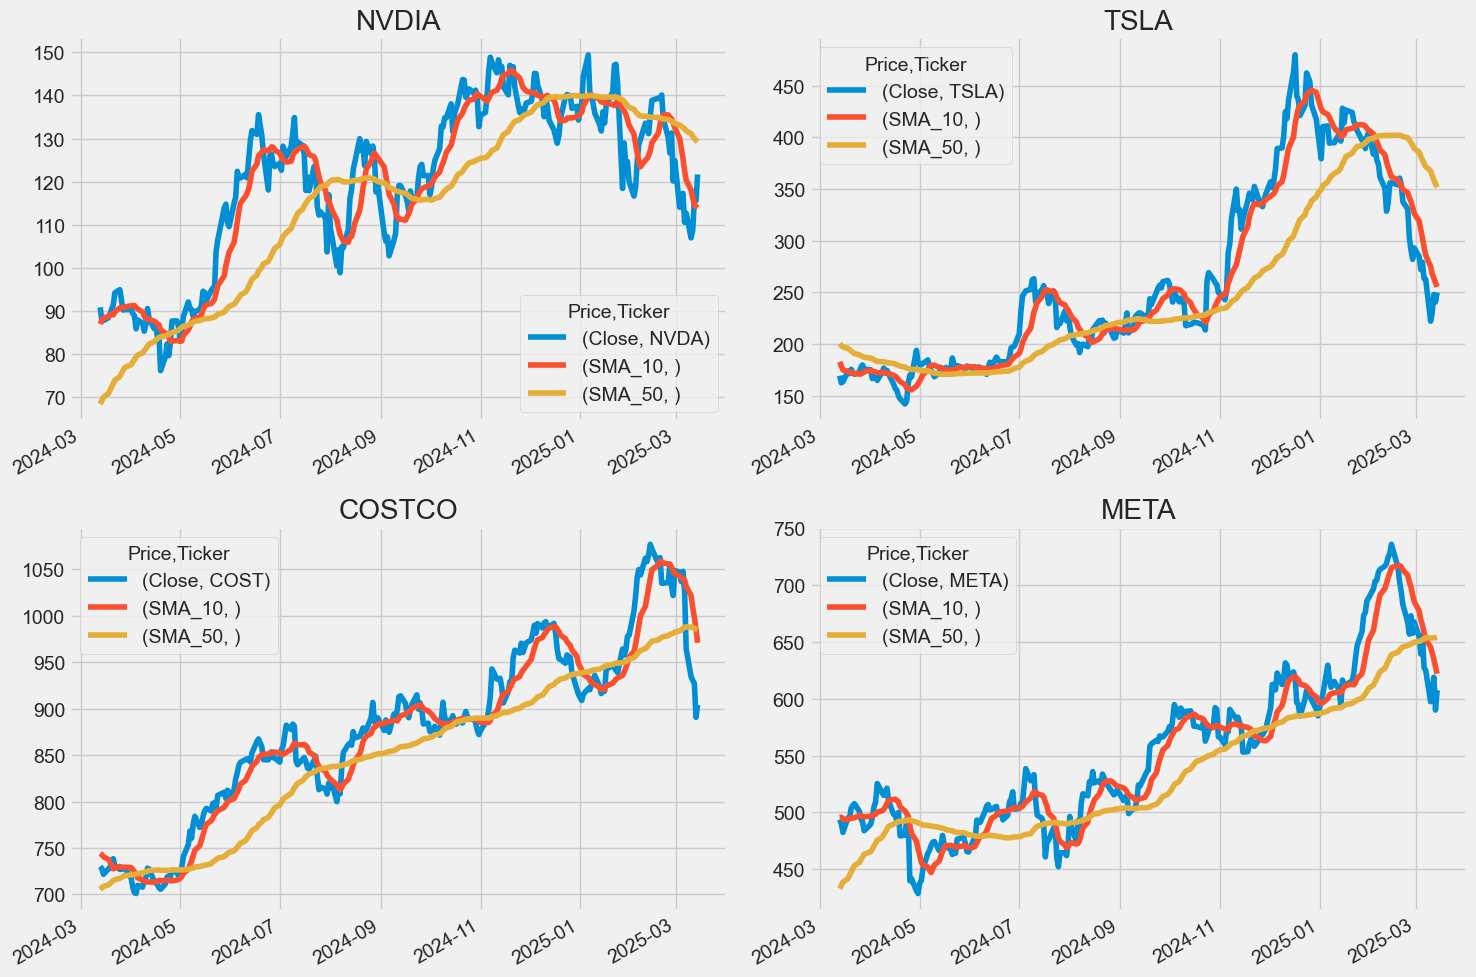

In [78]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Flatten to iterate easily

titles = ['NVDIA', 'TSLA', 'COSTCO', 'META']

# Loop through each company and plot the data
for i, company in enumerate(company_list):
    company[['Close', 'SMA_10', 'SMA_50']].plot(ax=axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('')  # Optionally remove the x-axis label

plt.tight_layout()
plt.show()


### Trend Identification:
- A short-term MA (SMA_10) that is above the long-term MA (SMA_50) generally indicates an upward trend. Conversely, if the SMA_10 falls below the SMA_50, it may suggest a downtrend.

### Crossover Signals:
- Crossovers between the short-term and long-term MAs can serve as potential buy or sell signals. For instance, when the SMA_10 crosses above the SMA_50, it might be interpreted as a bullish signal, while the reverse could indicate a bearish signal.


### Volatility Reduction:

By smoothing out the daily price fluctuations, the MAs help reveal the underlying momentum of the stock, making it easier to spot longer-term trends amidst the short-term noise.

## Daily Return of stock

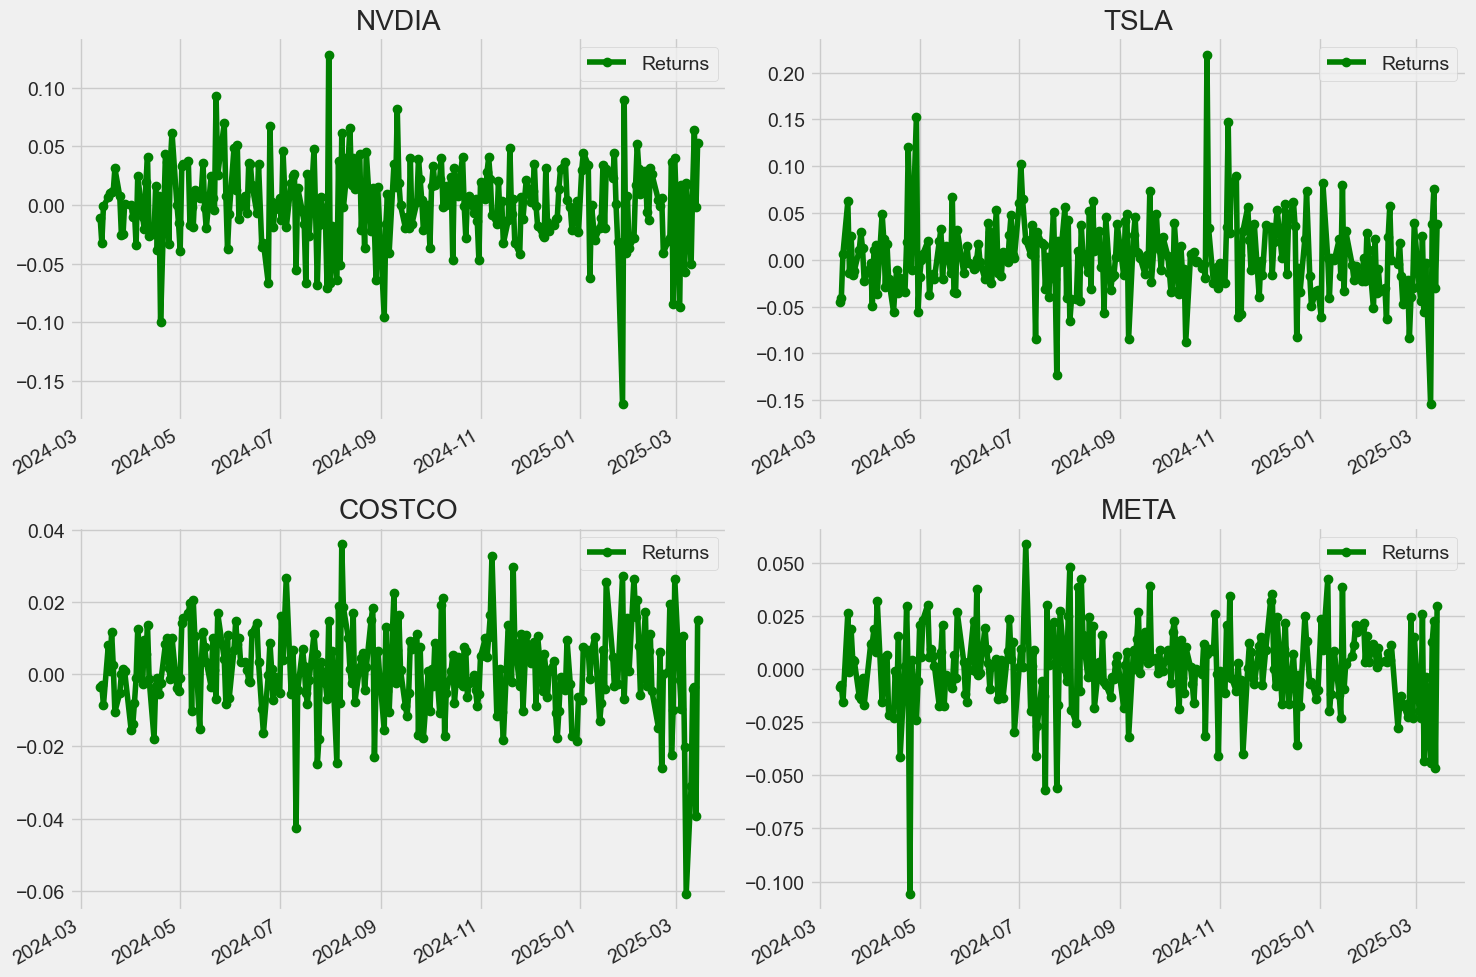

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

titles = ['NVDIA', 'TSLA', 'COSTCO', 'META']

for i, company in enumerate(company_list):
    company['Returns'].plot(ax=axs[i], legend=True, linestyle='-', marker='o', color = "g")
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()


Let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

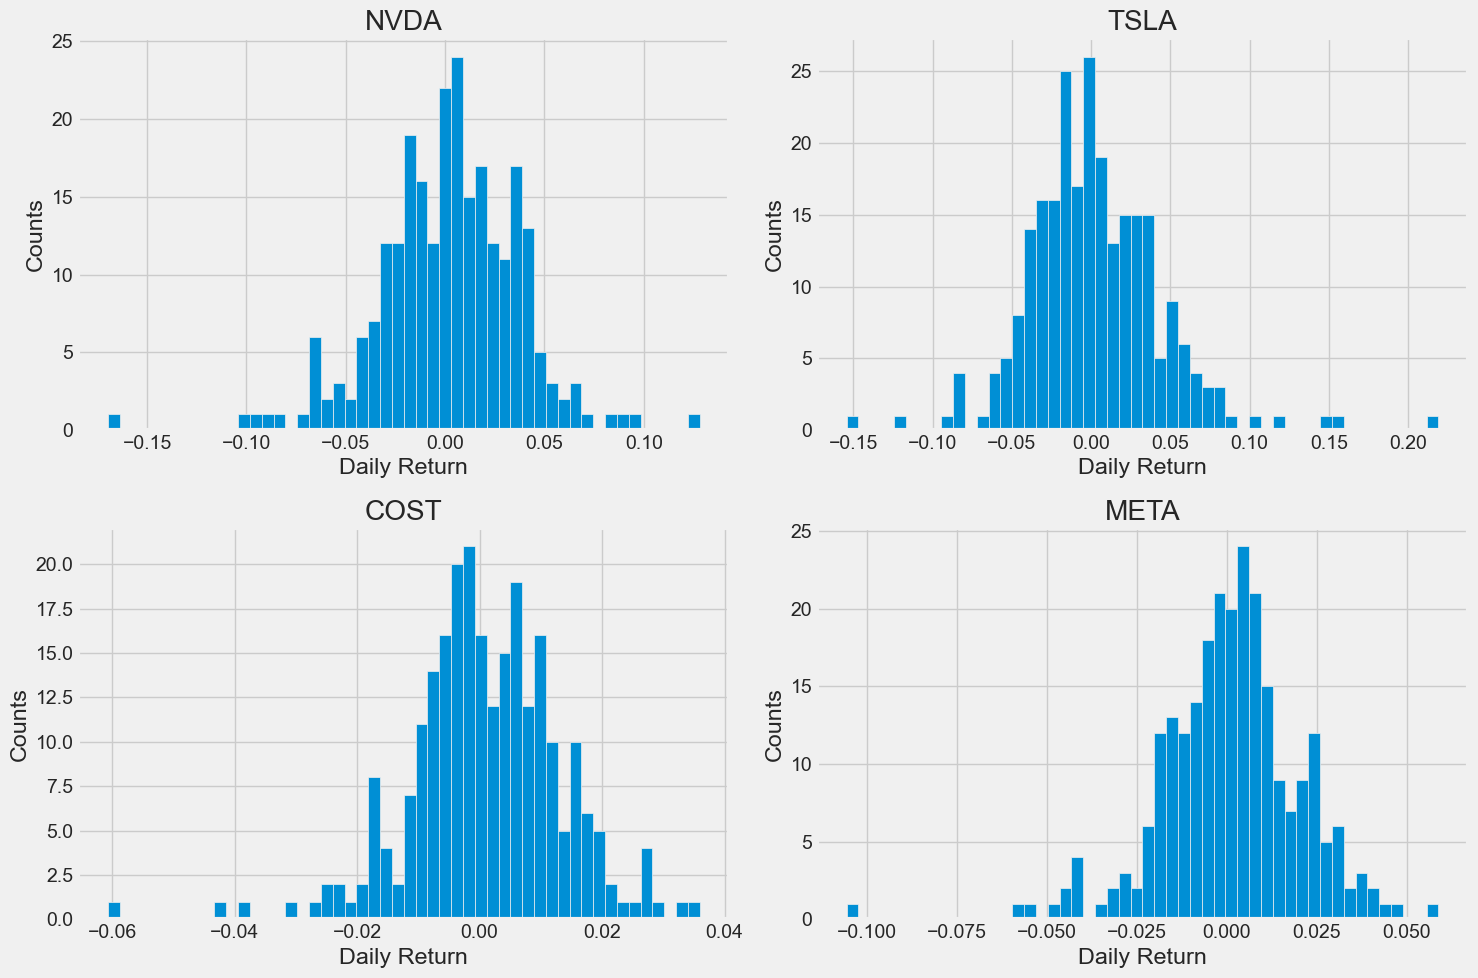

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, company in enumerate(company_list):
    axs[i].hist(company['Returns'], bins=50)
    axs[i].set_xlabel('Daily Return')
    axs[i].set_ylabel('Counts')
    axs[i].set_title(f'{company_code[i]}')

fig.tight_layout()
plt.show()
